In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df1=pd.read_csv("psm_test.csv")
df1

,timestamp_(min),feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24
0,132480.0,0.775374,0.909185,0.606704,0.660626,0.449968,0.426717,0.471591,0.434668,0.479511,...,0.400617,0.480444,0.588670,0.404036,0.638957,0.020236,0.042705,0.173375,0.008715,0.105991
1,132481.0,0.775423,0.909142,0.607796,0.660655,0.487813,0.442545,0.505682,0.448640,0.499451,...,0.396902,0.500213,0.587041,0.421605,0.637865,0.018550,0.042705,0.191826,0.010893,0.110599
2,132482.0,0.775458,0.909004,0.607988,0.660623,0.469532,0.433682,0.477273,0.450906,0.487223,...,0.389270,0.487982,0.582404,0.407393,0.636091,0.018550,0.039146,0.188361,0.010893,0.115207
3,132483.0,0.775513,0.909200,0.607218,0.660640,0.459910,0.435581,0.482955,0.454683,0.490431,...,0.403780,0.491253,0.584660,0.407141,0.638138,0.020236,0.042705,0.186975,0.013072,0.110599
4,132484.0,0.775587,0.909318,0.606654,0.660643,0.462155,0.436214,0.477273,0.449396,0.494671,...,0.403636,0.495947,0.581527,0.402761,0.632678,0.021922,0.042705,0.156325,0.008715,0.110599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87836,220316.0,0.864548,0.660041,0.590923,0.413322,0.364657,0.380184,0.494318,0.450529,0.382934,...,0.394973,0.386574,0.755608,0.355207,0.835244,0.000000,0.028470,0.164872,0.021786,0.069124
87837,220317.0,0.864483,0.536428,0.590742,0.413331,0.363695,0.378601,0.500000,0.451662,0.377564,...,0.386467,0.381169,0.562101,0.349141,0.490718,0.000000,0.010676,0.157812,0.015251,0.069124
87838,220318.0,0.864644,0.636236,0.590451,0.413619,0.348942,0.377018,0.488636,0.438822,0.373536,...,0.413731,0.377329,0.640556,0.342261,0.700519,0.000000,0.028470,0.163298,0.015251,0.129032
87839,220319.0,0.864553,0.643499,0.590222,0.413689,0.355997,0.379550,0.522727,0.448640,0.374963,...,0.416956,0.378751,0.759744,0.343052,0.828556,0.000000,0.032028,0.150160,0.017429,0.059908


In [14]:
df_label=pd.read_csv("psm_test_label.csv")
df_label=df_label.drop("timestamp_(min)",axis=1)
df_label

,label
0,0
1,0
2,0
3,0
4,0
...,...
87836,0
87837,0
87838,0
87839,0


In [15]:
df=pd.concat([df1,df_label],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87841 entries, 0 to 87840
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp_(min)  87841 non-null  float64
 1   feature_0        87841 non-null  float64
 2   feature_1        87841 non-null  float64
 3   feature_2        87841 non-null  float64
 4   feature_3        87841 non-null  float64
 5   feature_4        87841 non-null  float64
 6   feature_5        87841 non-null  float64
 7   feature_6        87841 non-null  float64
 8   feature_7        87841 non-null  float64
 9   feature_8        87841 non-null  float64
 10  feature_9        87841 non-null  float64
 11  feature_10       87841 non-null  float64
 12  feature_11       87841 non-null  float64
 13  feature_12       87841 non-null  float64
 14  feature_13       87841 non-null  float64
 15  feature_14       87841 non-null  float64
 16  feature_15       87841 non-null  float64
 17  feature_16  

 Data always requires some cleaning, there are missing values, an empty column and a timestamp with an incorrect data type. So I will apply the following steps to tidy up the data set.

Remove redundant columns

Remove duplicates

Handle missing values

Convert data types to the correct data type



In [8]:
# Drop ( In this dataset there will be no duplicate values either)
df = df.drop_duplicates()

# Handle missing values ,there will be no missing values
# Function that calculates the percentage of missing values
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent'])
    idx = nans['percent'] > 0
    return nans[idx]
# Let's use above function to look at top ten columns with NaNs
calc_percent_NAs(df).head(10)

,percent


In [16]:
# Let's convert the data type of timestamp column to datatime format
import warnings
warnings.filterwarnings("ignore")
df['date'] = pd.to_datetime(df['timestamp_(min)'])
del df['timestamp_(min)']

After some analysis, you have to decided to impute some of the missing values with their mean and drop the rest. After data visualisation process, my  data looks as follows and is ready for the next step which is Exploratory Data Analysis. The data set has 25 features, label column that contains two classes and then the date column which represents the timestamp.

In [23]:
df=df.set_index(df['date'])
df=df.drop('date',axis=1)
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,label
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000132480,0.775374,0.909185,0.606704,0.660626,0.449968,0.426717,0.471591,0.434668,0.479511,0.478078,...,0.480444,0.588670,0.404036,0.638957,0.020236,0.042705,0.173375,0.008715,0.105991,0
1970-01-01 00:00:00.000132481,0.775423,0.909142,0.607796,0.660655,0.487813,0.442545,0.505682,0.448640,0.499451,0.494367,...,0.500213,0.587041,0.421605,0.637865,0.018550,0.042705,0.191826,0.010893,0.110599,0
1970-01-01 00:00:00.000132482,0.775458,0.909004,0.607988,0.660623,0.469532,0.433682,0.477273,0.450906,0.487223,0.484878,...,0.487982,0.582404,0.407393,0.636091,0.018550,0.039146,0.188361,0.010893,0.115207,0
1970-01-01 00:00:00.000132483,0.775513,0.909200,0.607218,0.660640,0.459910,0.435581,0.482955,0.454683,0.490431,0.488316,...,0.491253,0.584660,0.407141,0.638138,0.020236,0.042705,0.186975,0.013072,0.110599,0
1970-01-01 00:00:00.000132484,0.775587,0.909318,0.606654,0.660643,0.462155,0.436214,0.477273,0.449396,0.494671,0.487094,...,0.495947,0.581527,0.402761,0.632678,0.021922,0.042705,0.156325,0.008715,0.110599,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000220316,0.864548,0.660041,0.590923,0.413322,0.364657,0.380184,0.494318,0.450529,0.382934,0.449698,...,0.386574,0.755608,0.355207,0.835244,0.000000,0.028470,0.164872,0.021786,0.069124,0
1970-01-01 00:00:00.000220317,0.864483,0.536428,0.590742,0.413331,0.363695,0.378601,0.500000,0.451662,0.377564,0.315392,...,0.381169,0.562101,0.349141,0.490718,0.000000,0.010676,0.157812,0.015251,0.069124,0
1970-01-01 00:00:00.000220318,0.864644,0.636236,0.590451,0.413619,0.348942,0.377018,0.488636,0.438822,0.373536,0.374673,...,0.377329,0.640556,0.342261,0.700519,0.000000,0.028470,0.163298,0.015251,0.129032,0


# Exploratory Data Analysis (EDA)
Now that we have visualize our data, we can start exploring to acquaint with the data set.

On top of some quantitative EDA, I performed additional graphical EDA to look for trends and any odd behaviors. In particular, it is interesting to see the feature readings plotted over time with the label of “1” marked up on the same graph in red color. The following code plots the mentioned graph for each of the features.

In [25]:
print(len(df[df["label"]==1]))
print(len(df[df["label"]==0]))

24381
63460


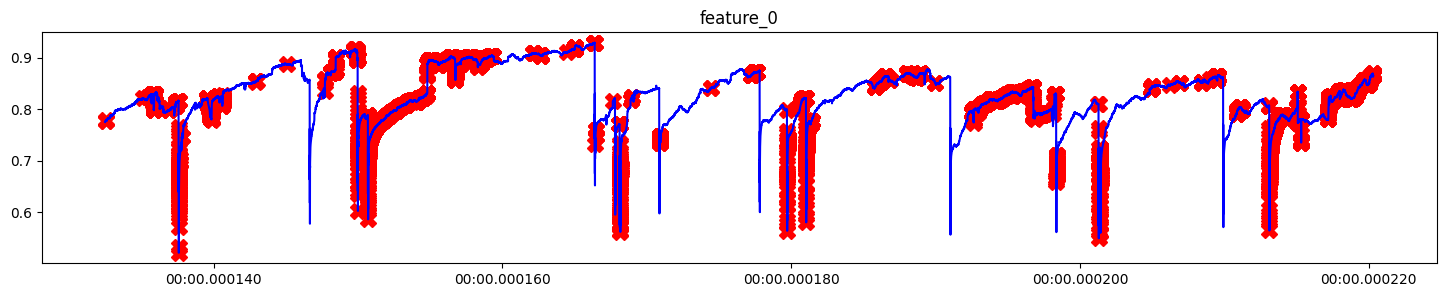

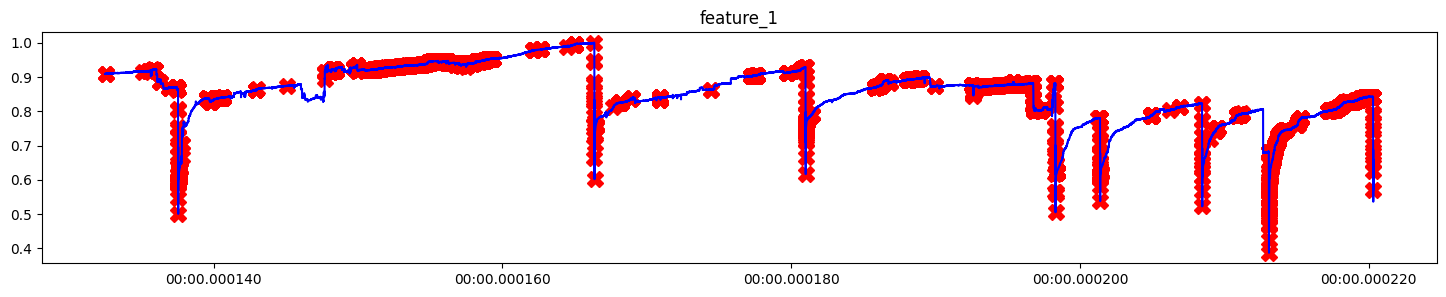

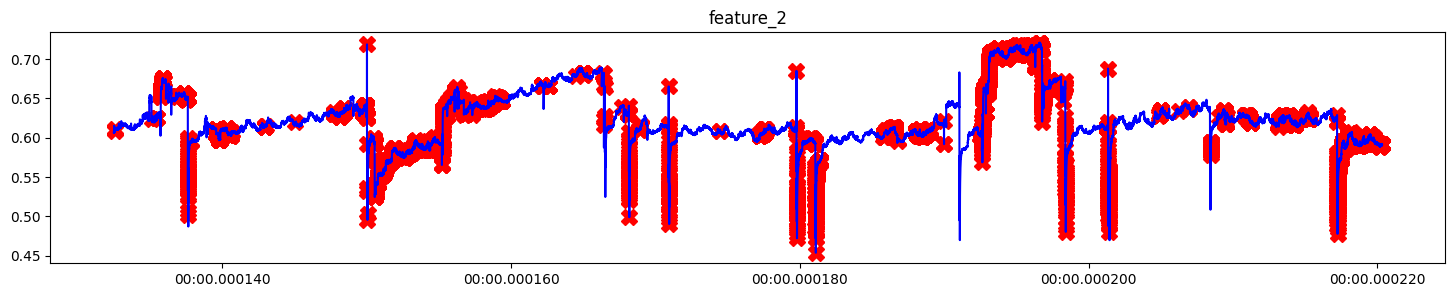

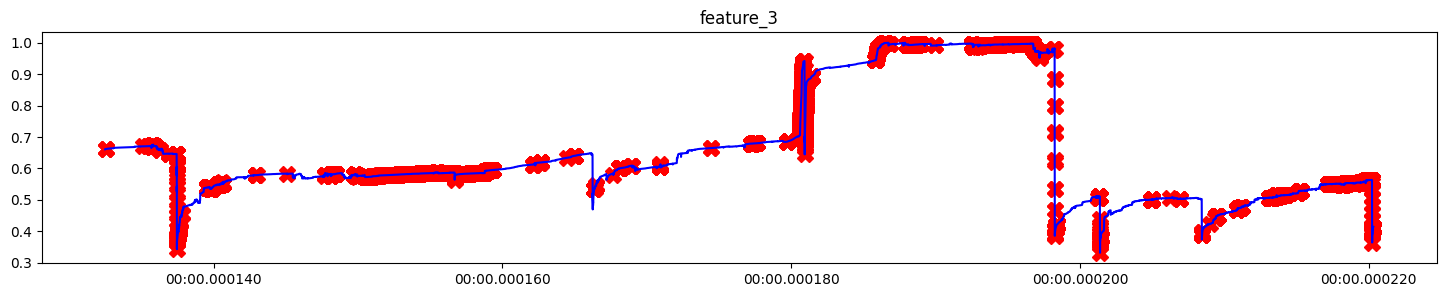

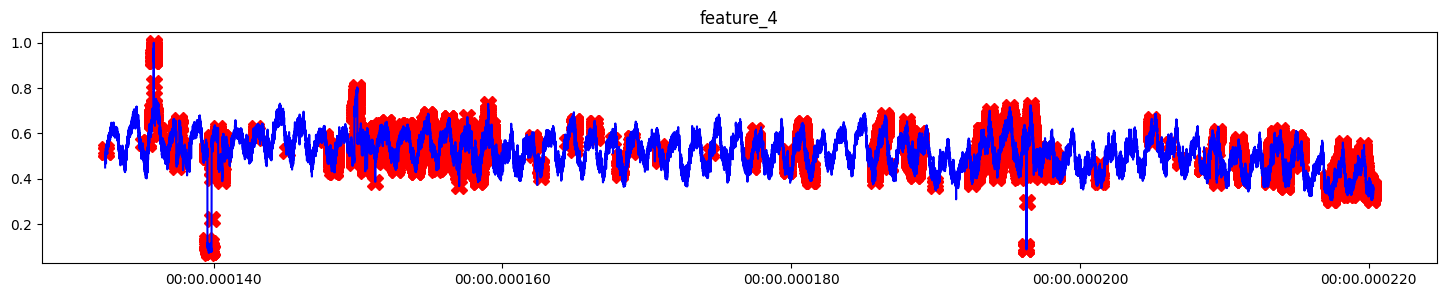

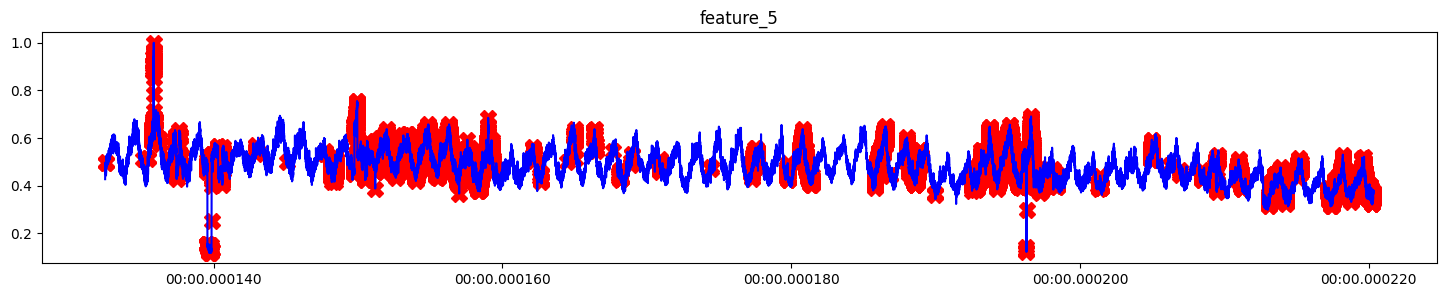

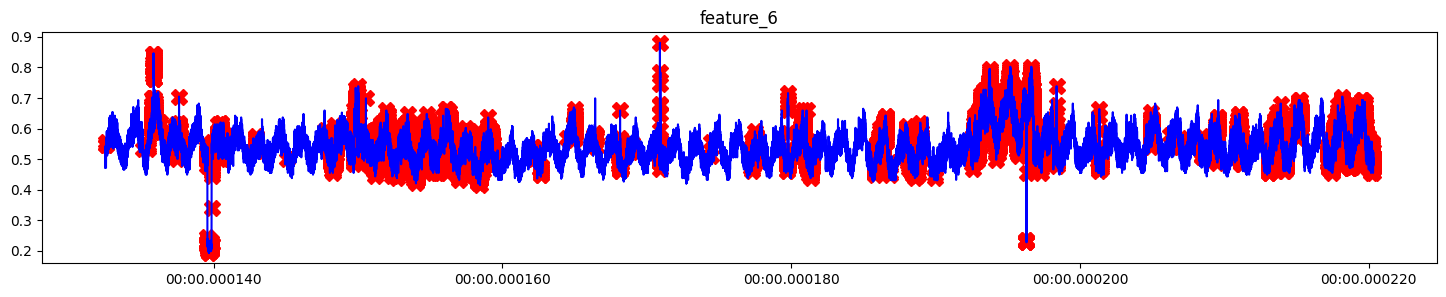

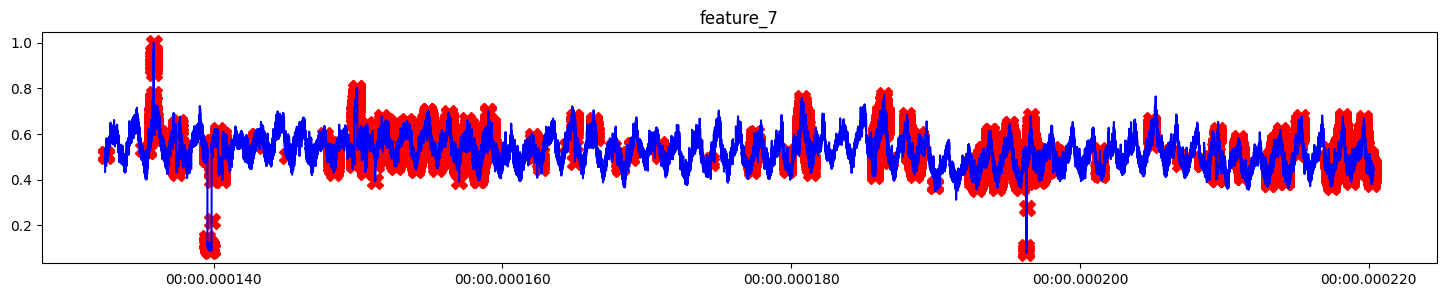

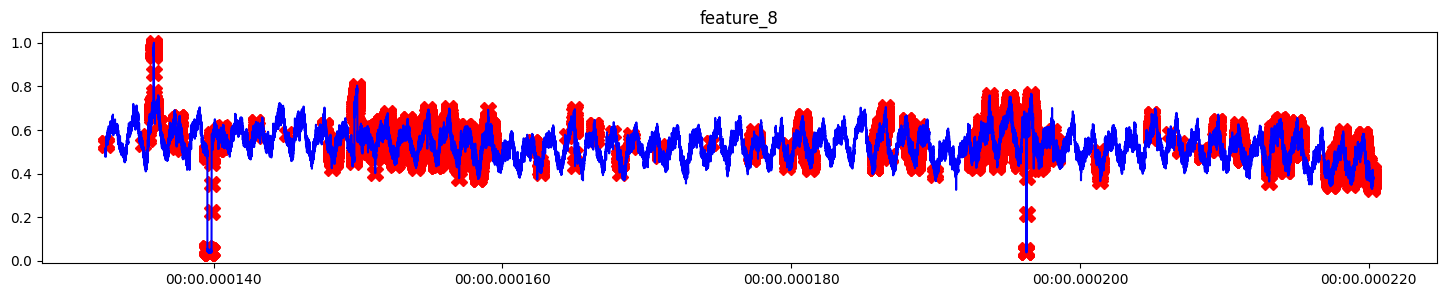

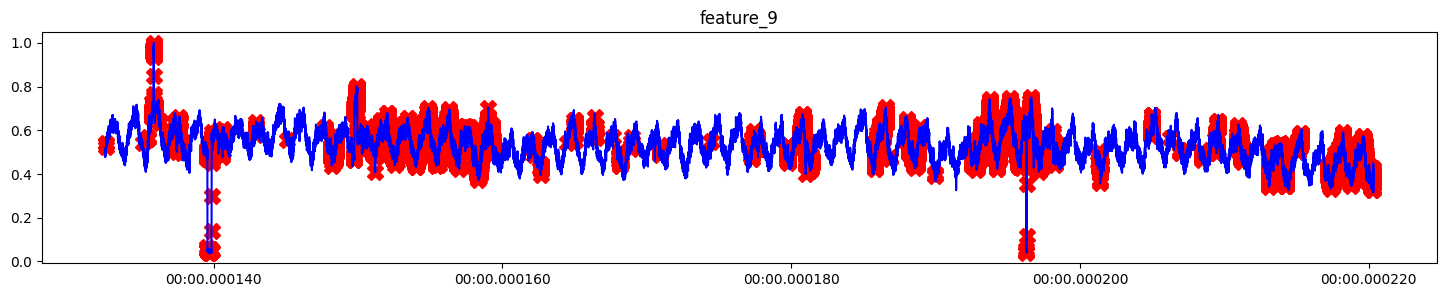

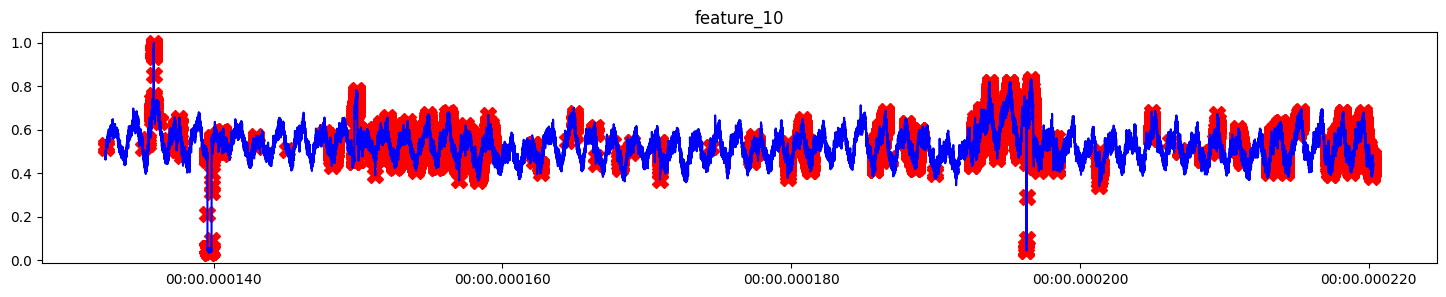

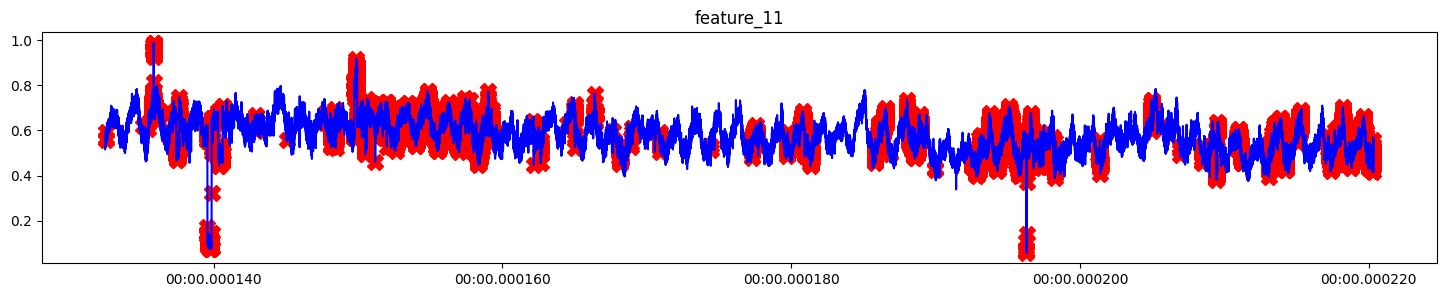

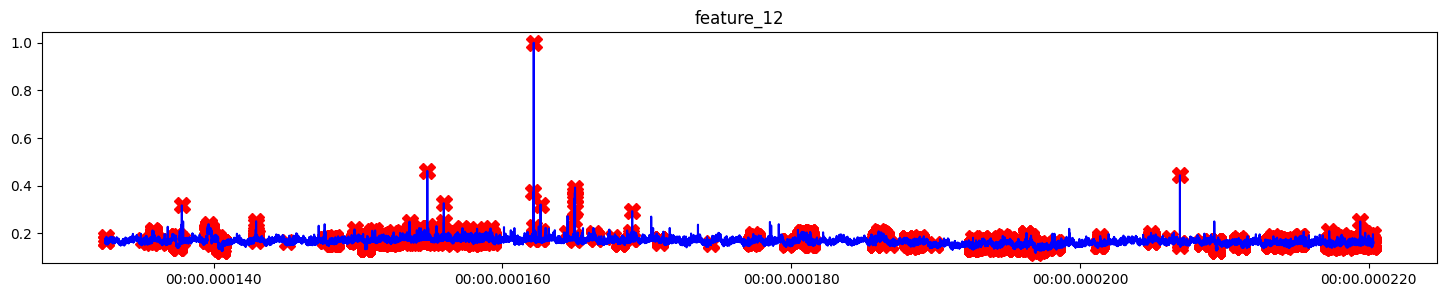

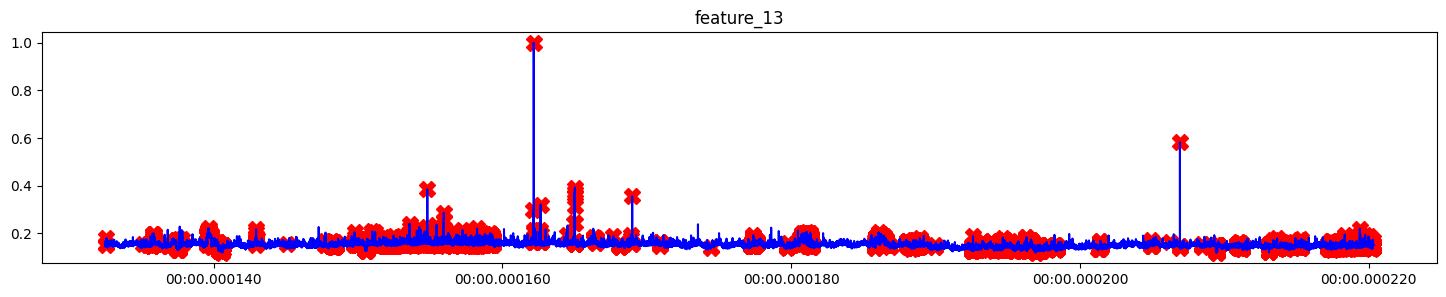

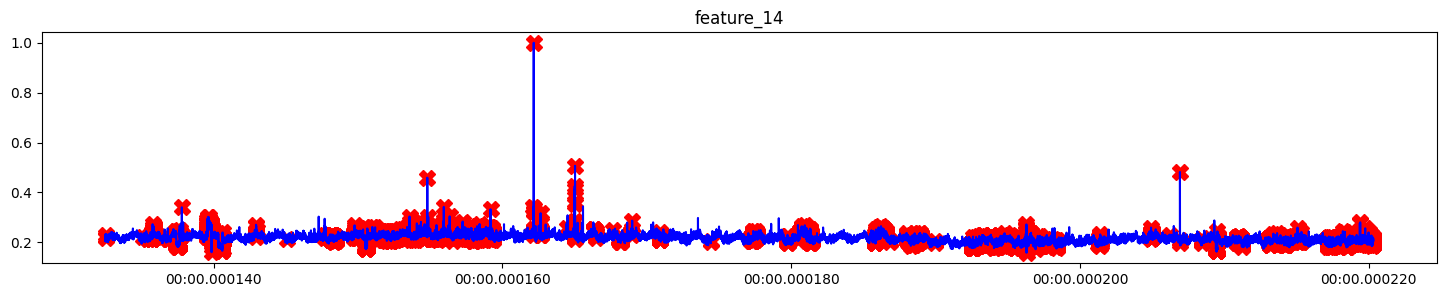

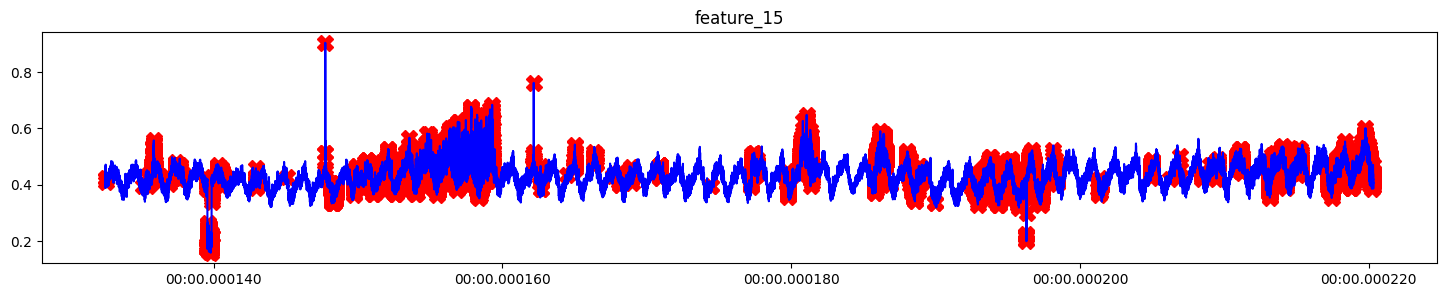

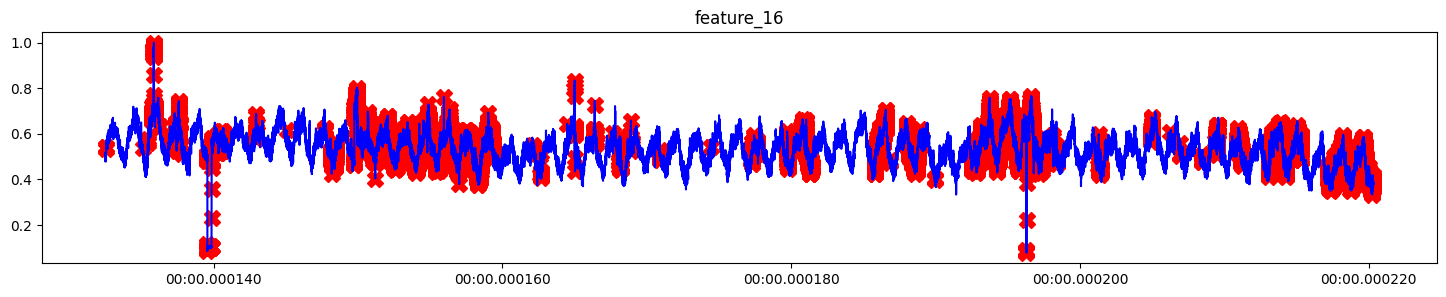

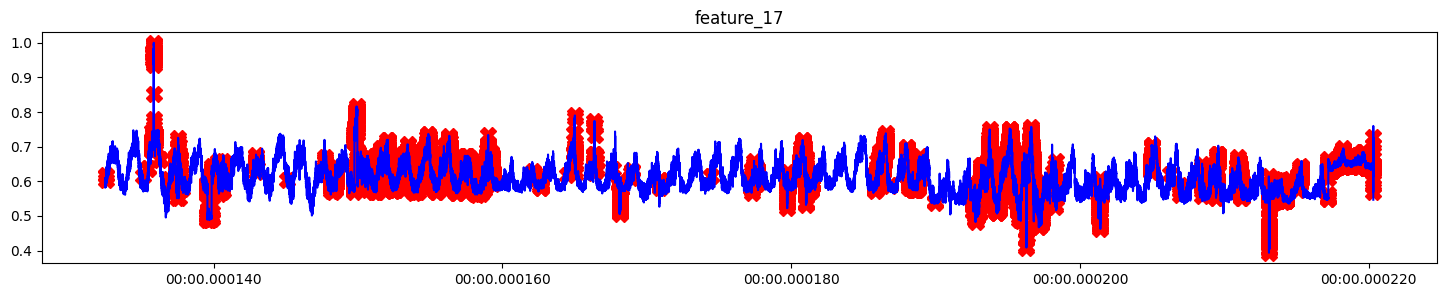

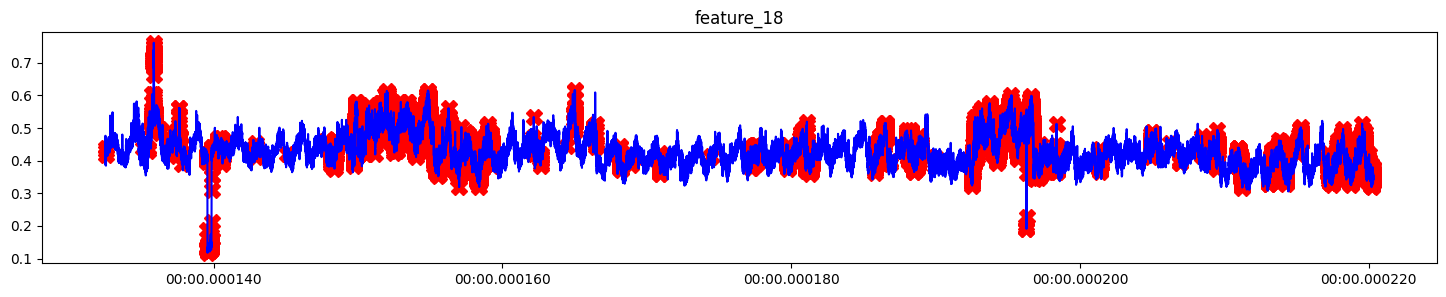

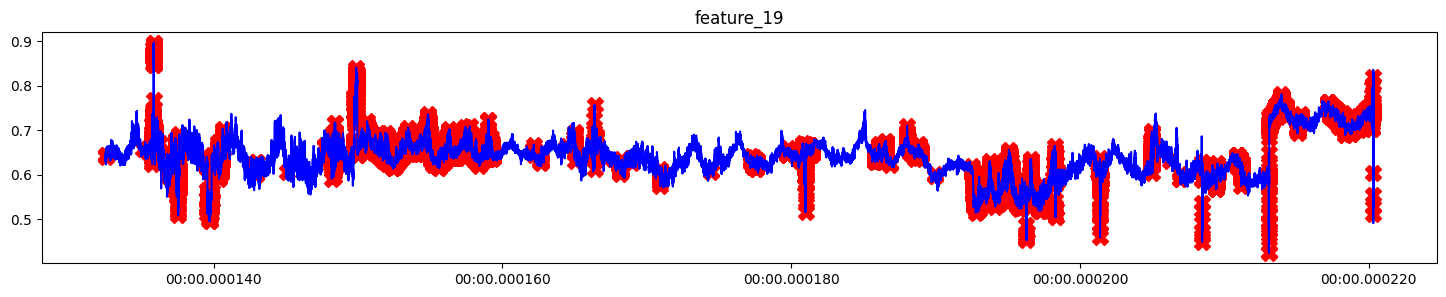

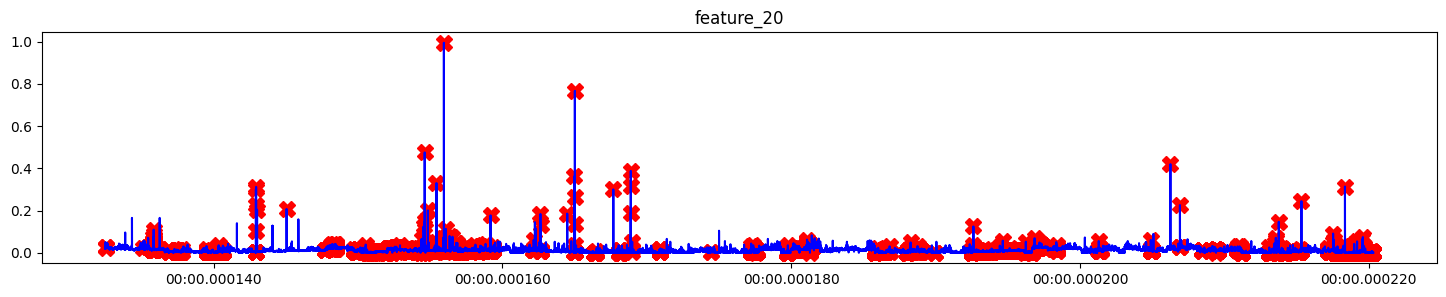

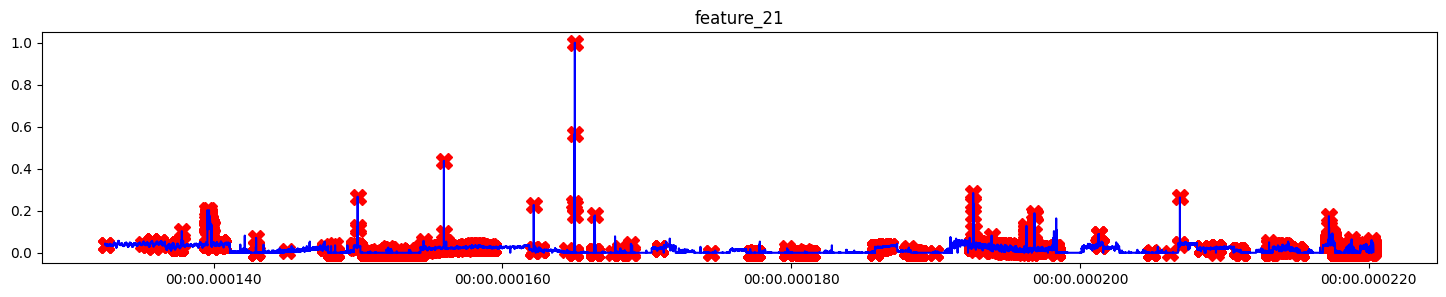

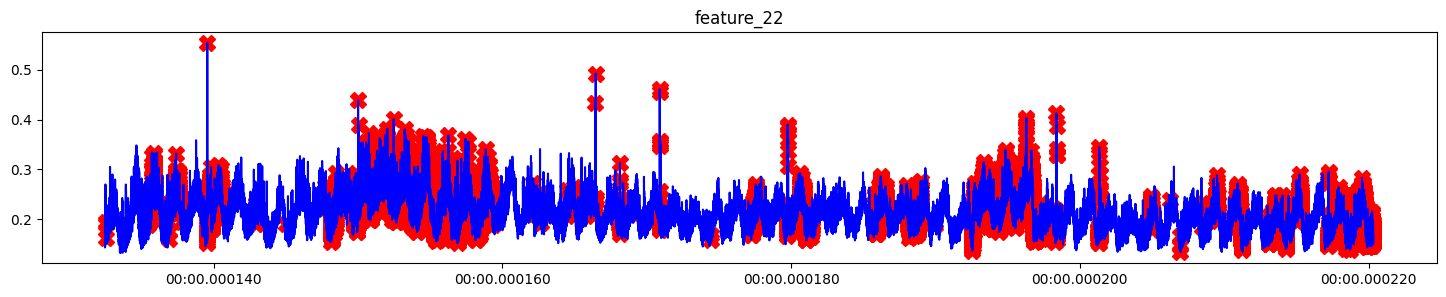

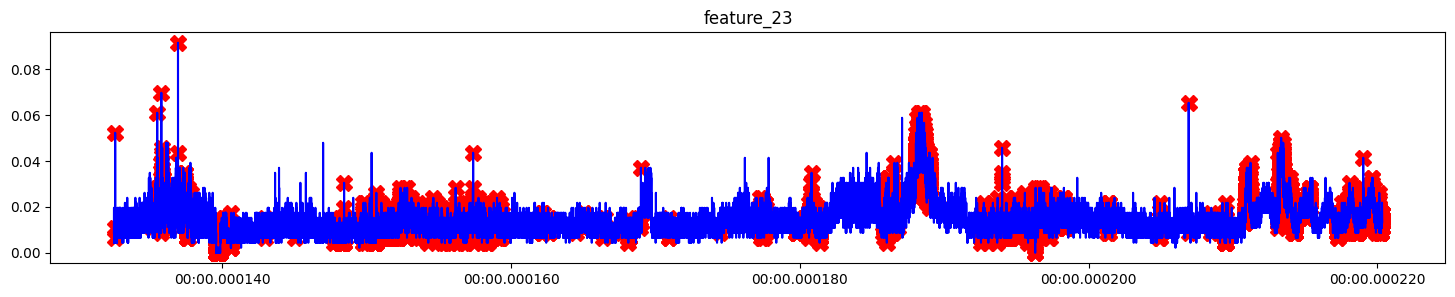

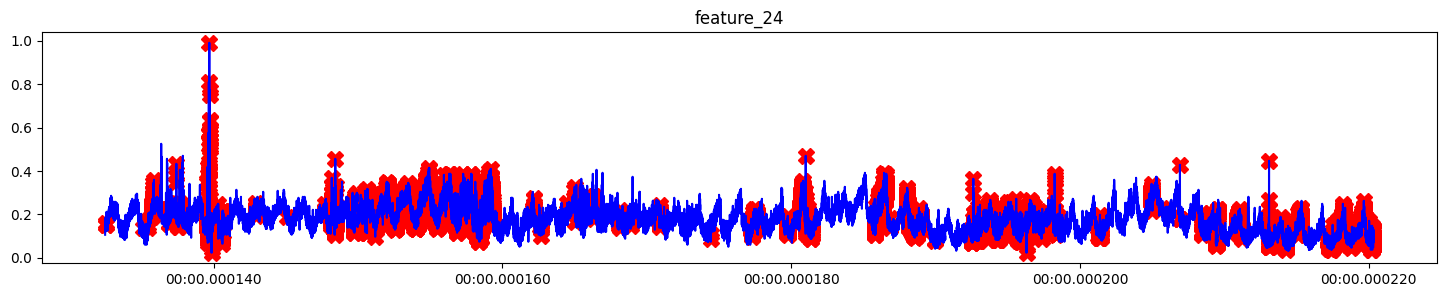

In [24]:
# Extract the readings from the label having value 1.
anomaly = df[df['label']==1]
# Extract the names of the numerical columns
df2 = df.drop(['label'], axis=1)
names=df2.columns
# Plot time series for  label value=1, marked with X in red color
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(anomaly[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[name], color='blue')
    _ = plt.title(name)
    plt.show()

As seen clearly from the above plot, the red marks, which represent label with value ==1, perfectly overlaps with the observed disturbances of the feature reading. Now we have a pretty good intuition about how each of the feature reading behaves when label is equal to 1..

#Stationarity and Autocorrelation
In time series analysis, it is important that the data is stationary and have no autocorrelation. Stationarity refers to the behavior where the mean and standard deviation of the data changes over time, the data with such behavior is considered not stationary. On the other hand, autocorrelation refers to the behavior of the data where the data is correlated with itself in a different time period. As the next step, I will visually inspect the stationarity of each feature in the data set and the following code will do just that. Later, we will also perform the Dickey Fuller test to quantitatively verify the observed stationarity. In addition, we will inspect the autocorrelation of the features before feeding them into the clustering algorithms to detect anomalies.

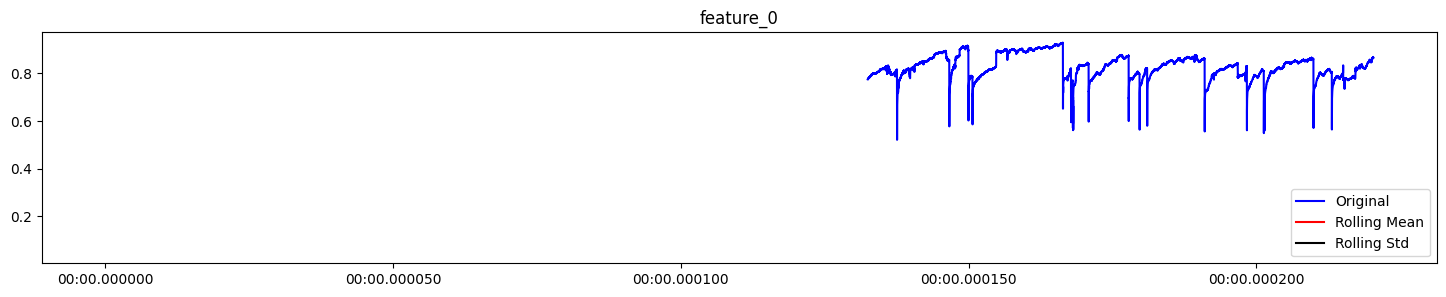

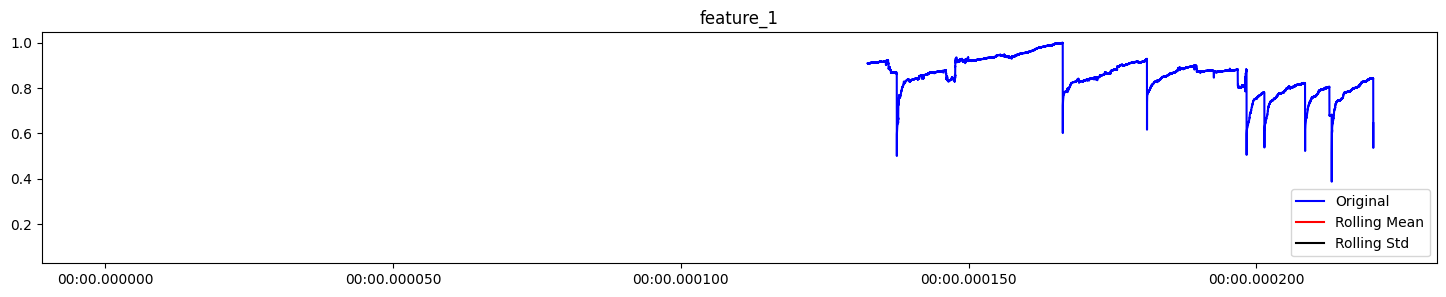

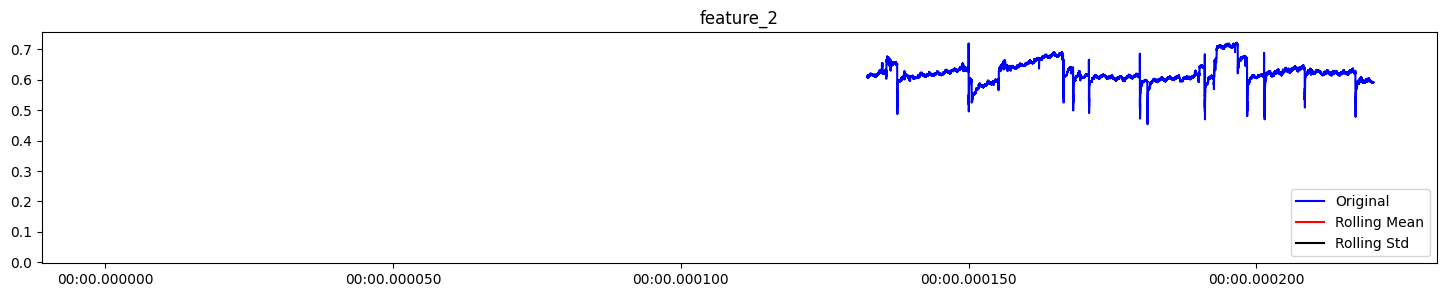

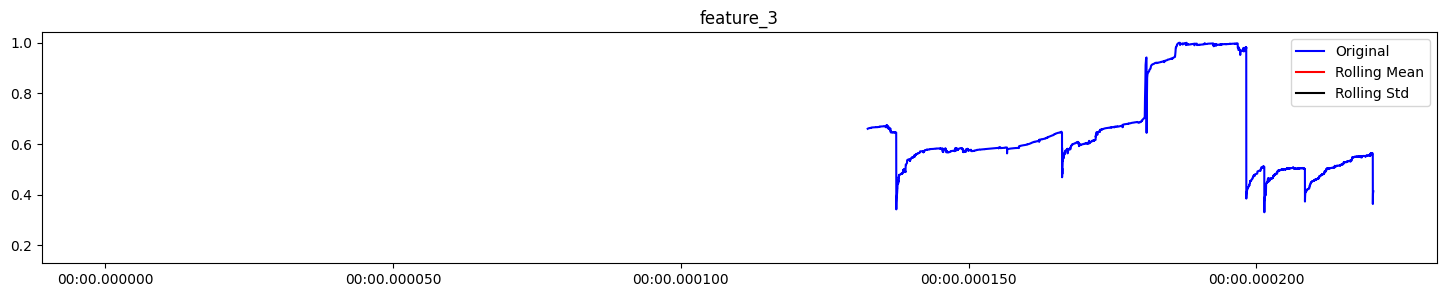

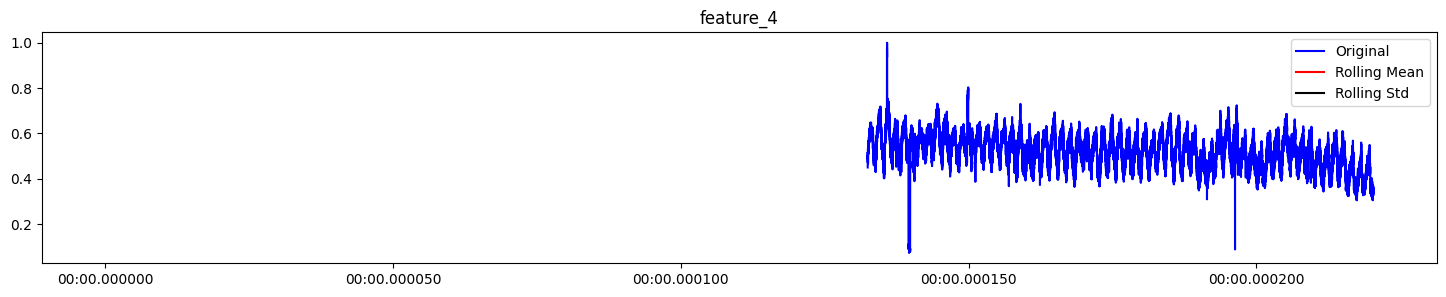

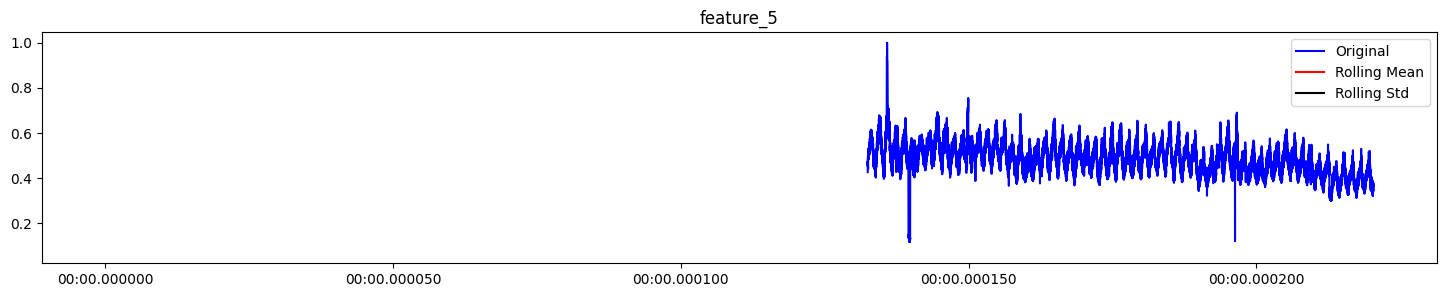

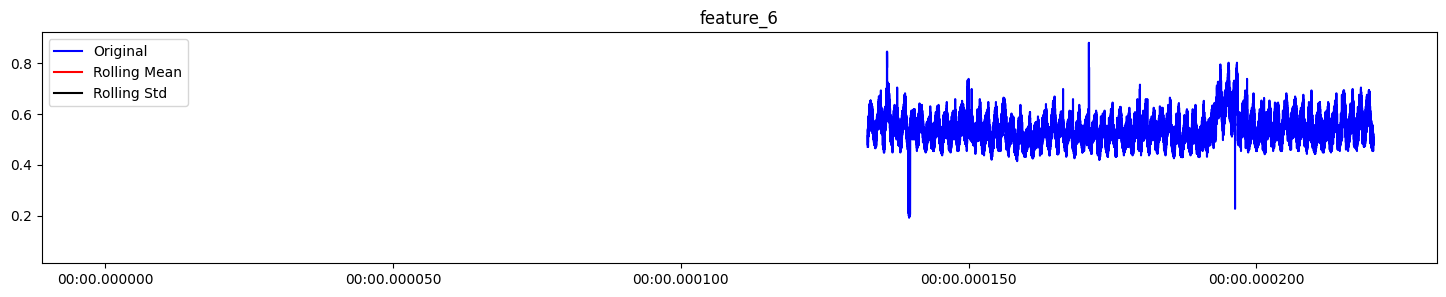

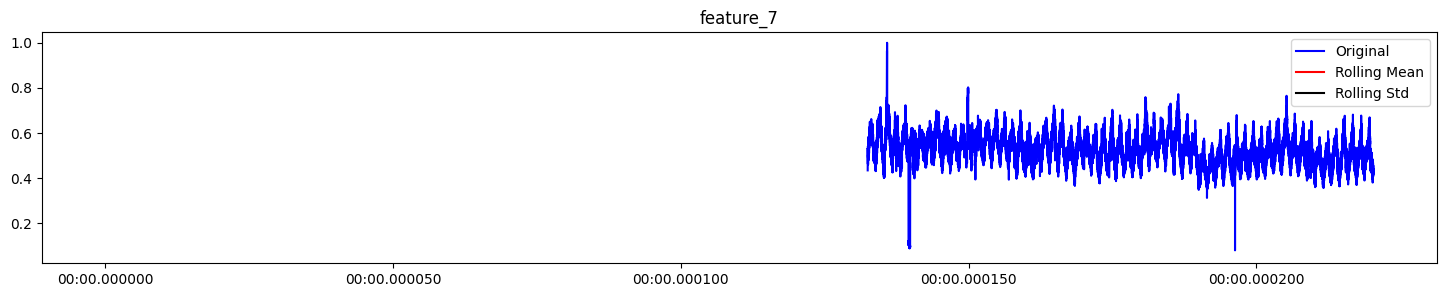

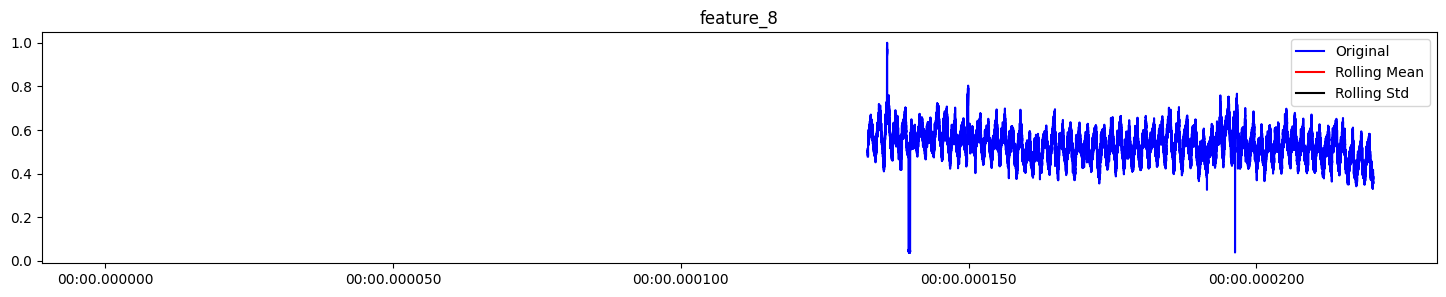

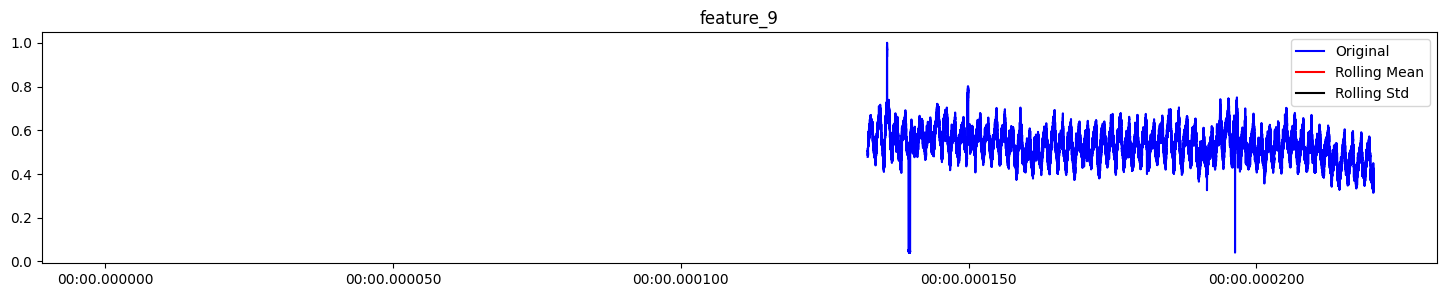

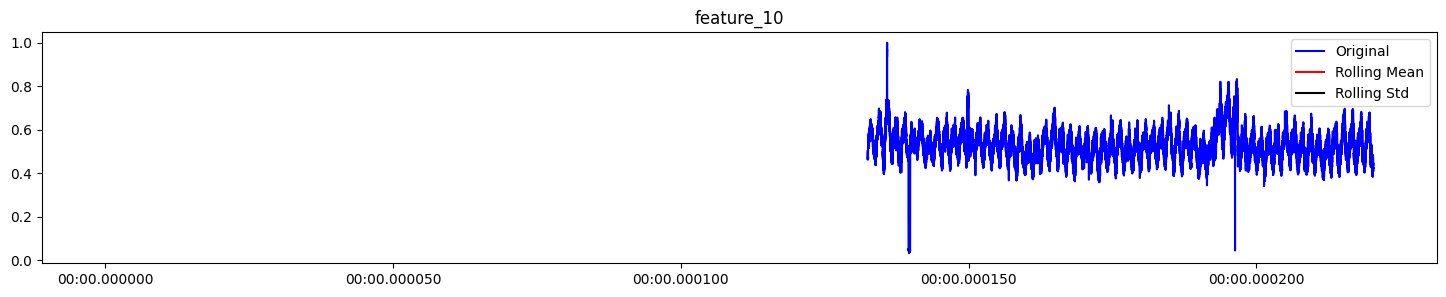

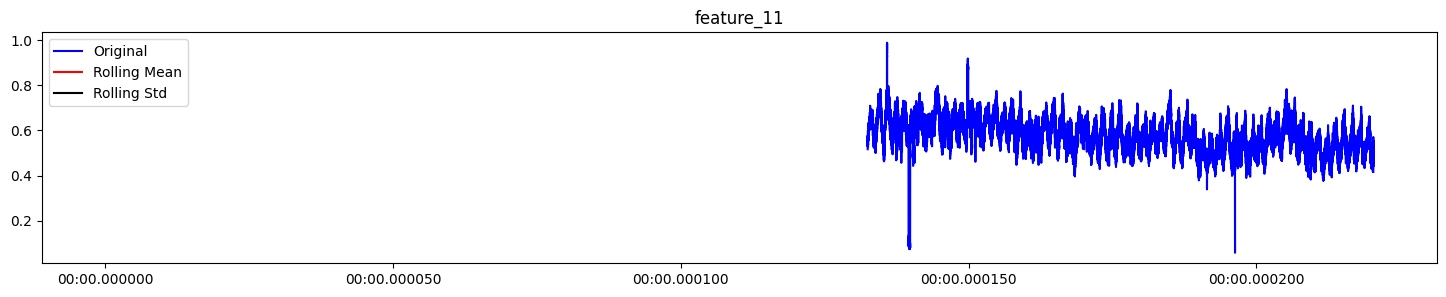

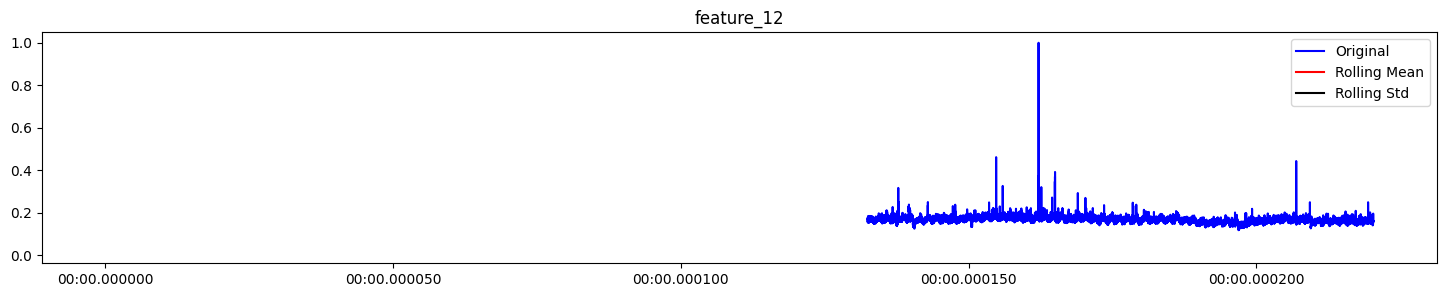

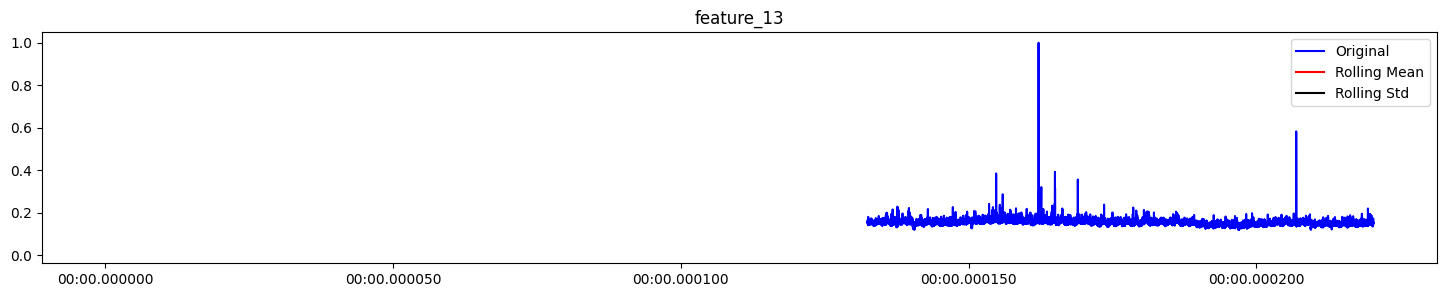

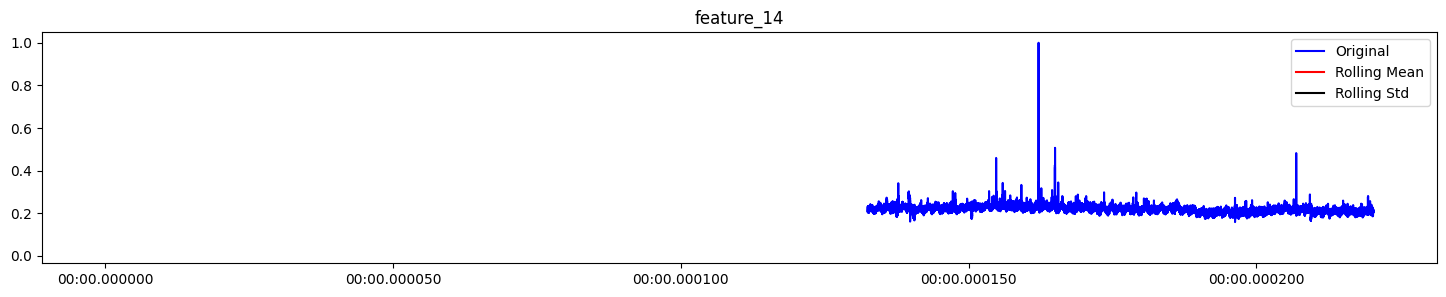

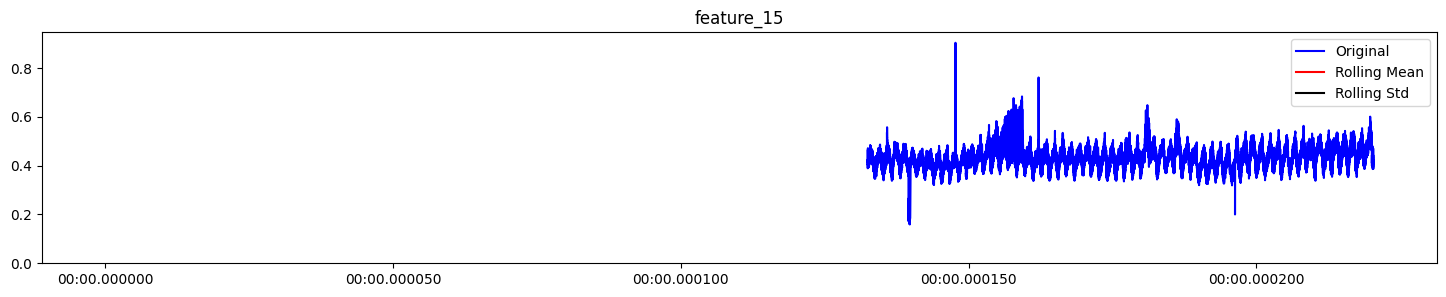

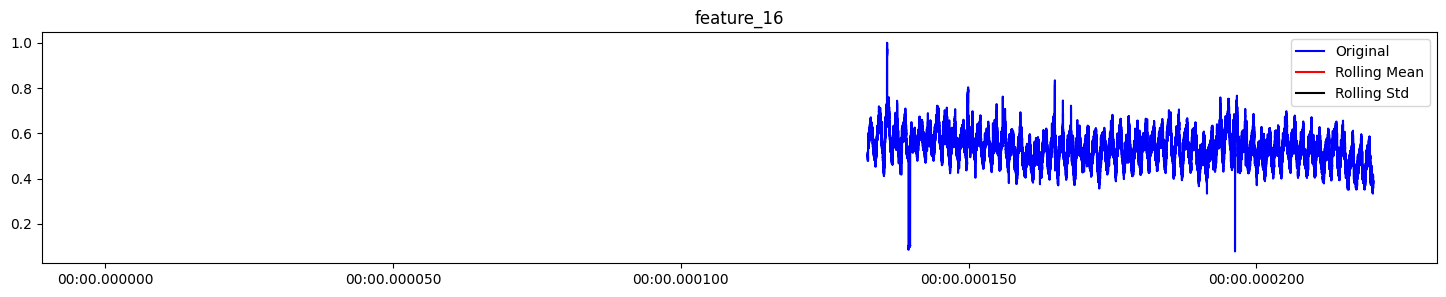

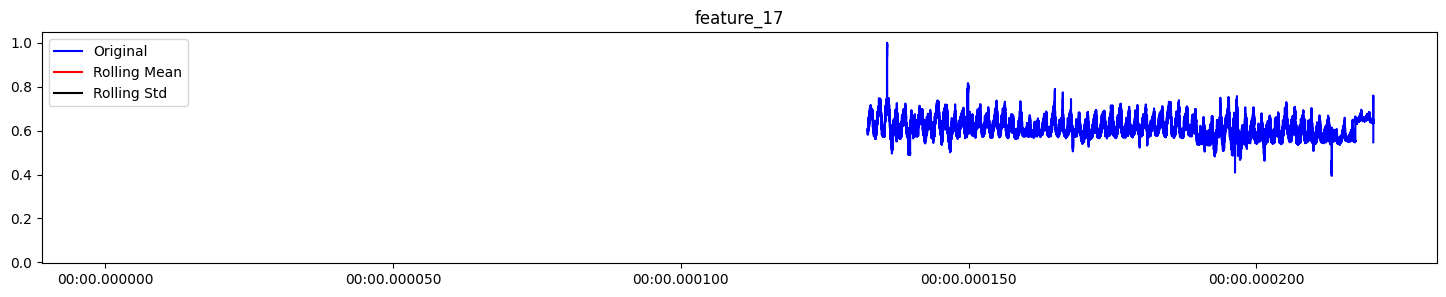

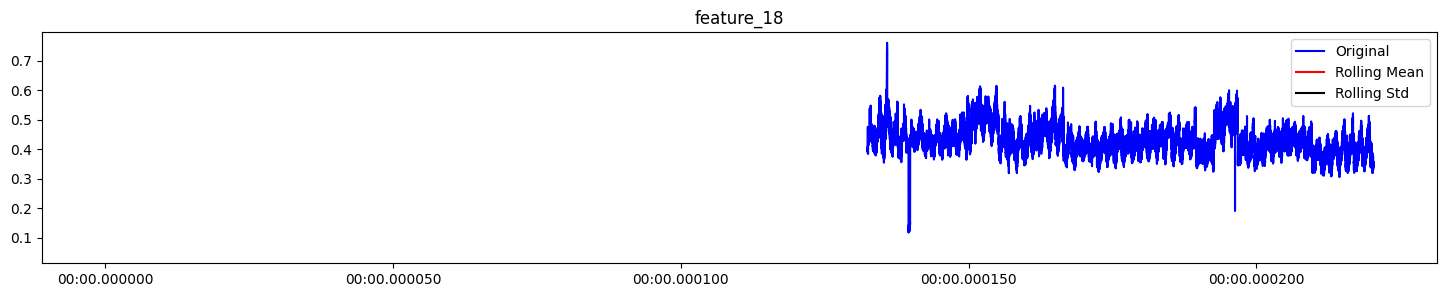

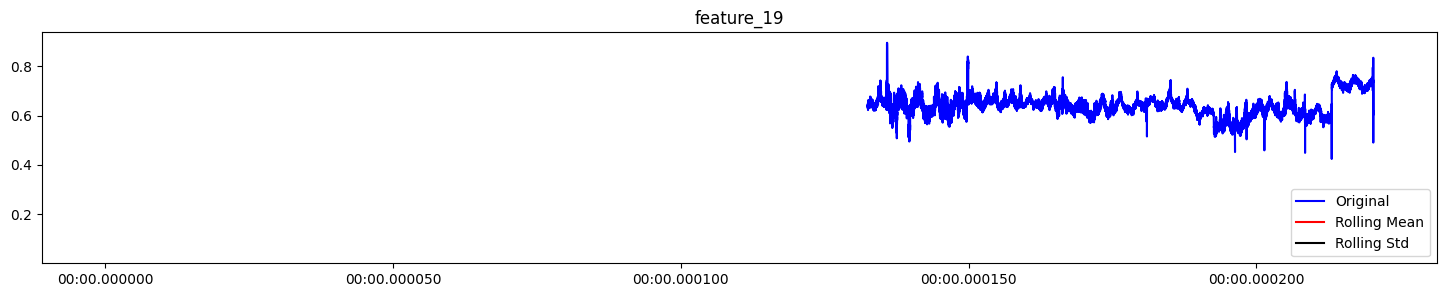

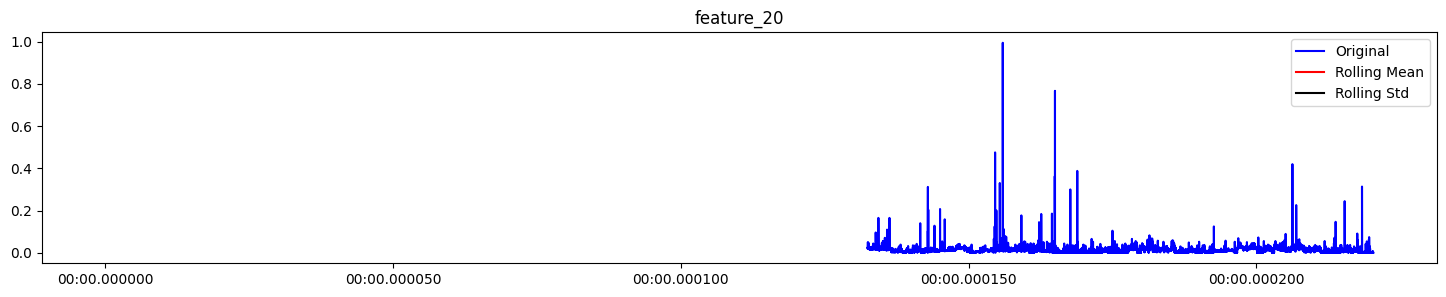

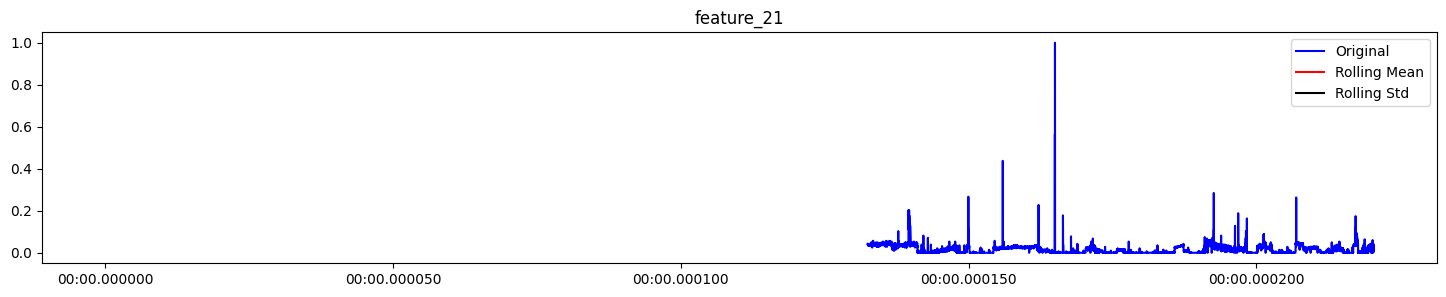

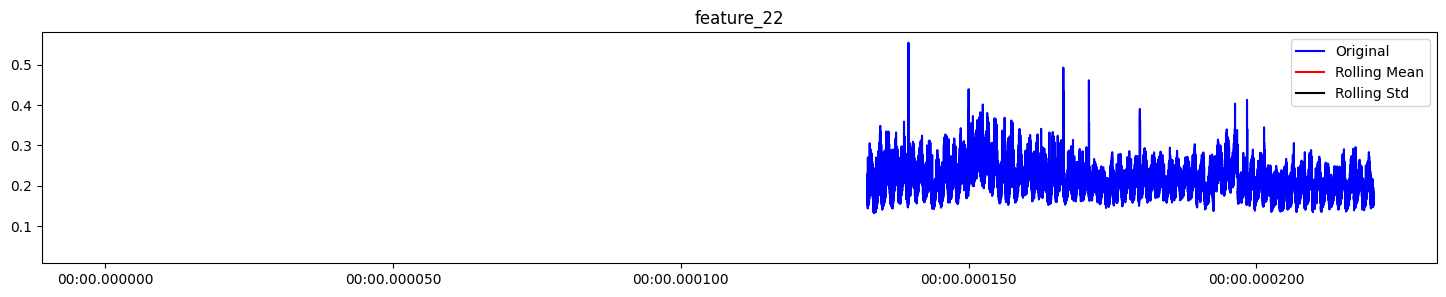

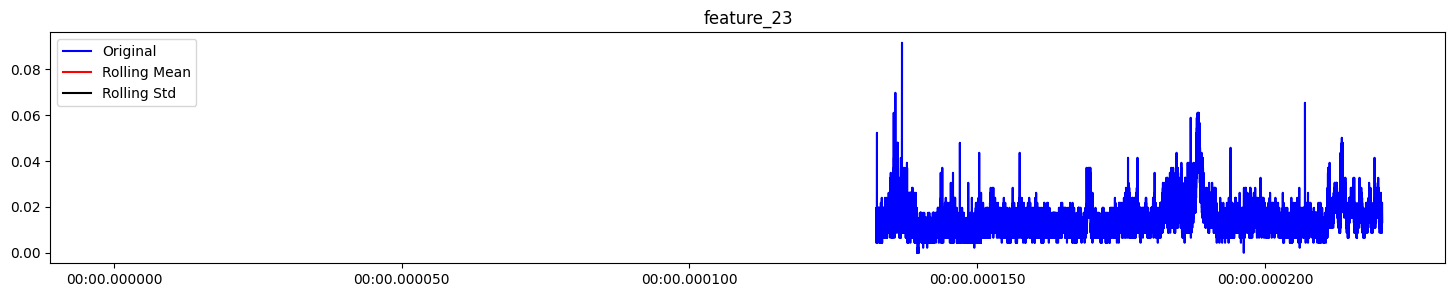

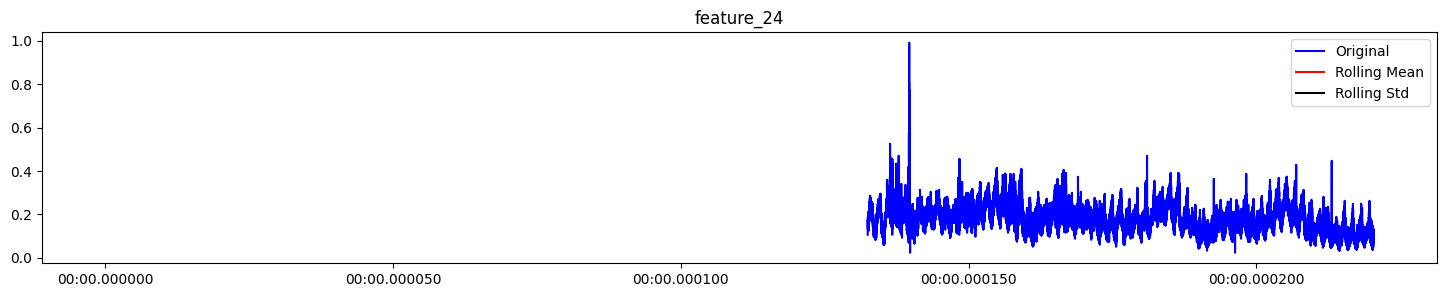

In [26]:
# Resample the entire dataset by daily average
rollmean = df.resample(rule='D').mean()
rollstd = df.resample(rule='D').std()
# Plot time series for each sensor with its mean and standard deviation
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

Looking at the readings from all the features in this case, notice that the data actually looks pretty stationary where the rolling mean and standard deviation don’t seem to change over time. This was the case for most of the feature in this data set but it may not always be the case in which situations various transformation methods must be applied to make the data stationary before training the data.

#Pre-Processing and Dimensionality Reduction
It is pretty computationally expensive to train models with all of the 25 features and it is not efficient. Therefore, I will employ Principal Component Analysis (PCA) technique to extract new features to be used for the modeling. In order to properly apply PCA, the data must be scaled and standardized. This is because PCA and most of the learning algorithms are distance based algorithms. If noticed from the first 10 rows of the  data, the magnitude of the values from each feature is not consistent. Some are very small while some others are really large values. I will perform the following steps using the Pipeline library.

Scale the data

Perform PCA and look at the most important principal components based on inertia

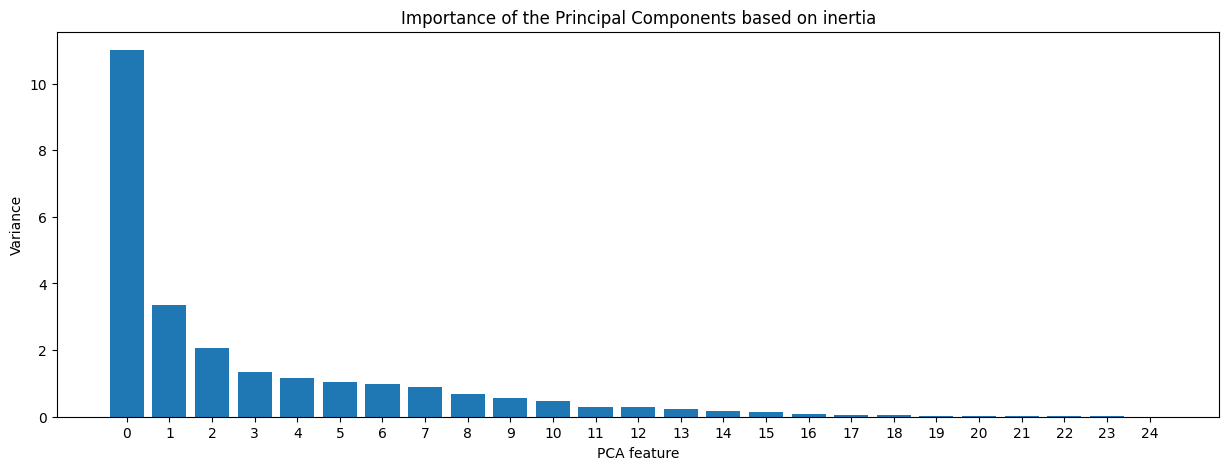

In [27]:
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# Extract the names of the numerical columns
df2 = df.drop(['label'], axis=1)
names=df2.columns
x = df[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)
# Plot the principal components against their inertia
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

It appears that the first two principal components are the most important as per the features extracted by the PCA in above importance plot. So as the next step, I will perform PCA with 2 components which will be my features to be used in the training of the models.

In [28]:
# Calculate PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

Now, I will check again the stationarity and autocorrelation of these two principal components just to be sure they are stationary and not autocorrelated.

In [29]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

4.191454363514034e-16


Running the Dickey Fuller test on the 1st principal component, I got a p-value of 4.191454363514034e-16
  which is very small number (much smaller than 0.05). Thus, I will reject the Null Hypothesis and say the data is stationary. I performed the same on the 2nd component and got a similar result. So both of the principal components are stationary which is what I wanted.

Given my new features from PCA are stationary and not autocorrelated, I am ready for modeling.

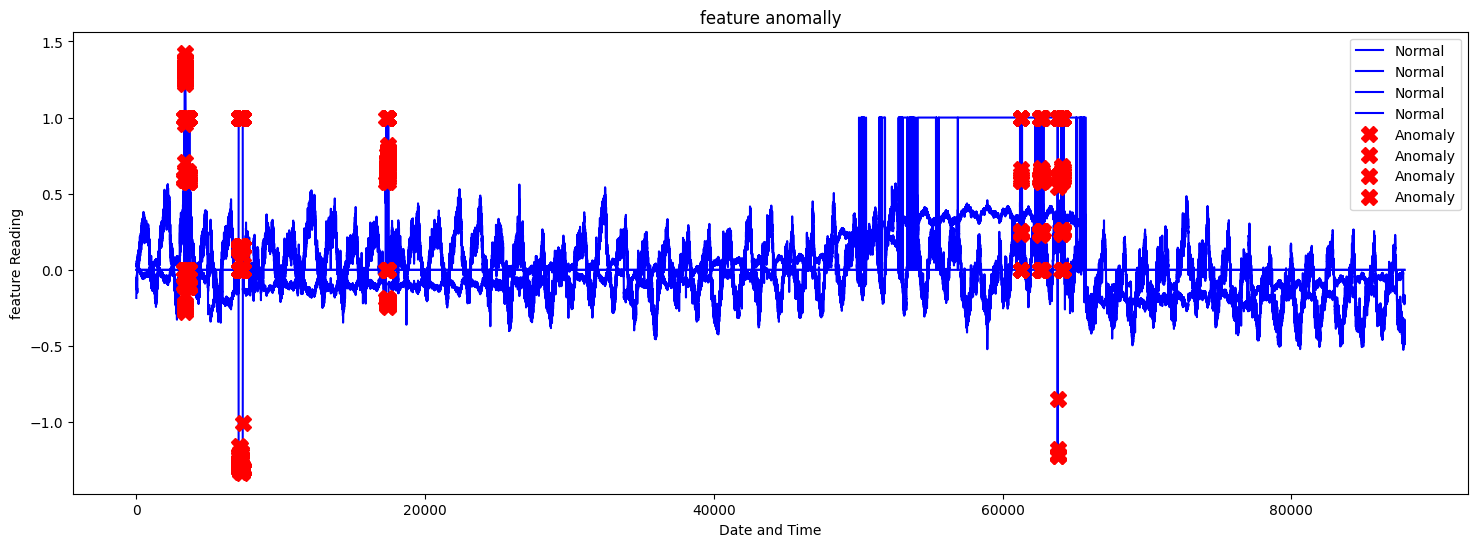

In [40]:
# Calculate IQR for the 1st principal component (pc1)
q1_pc1, q3_pc1 = principalDf['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
# Calculate upper and lower bounds for outlier for pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
# Filter out the outliers from the pc1
principalDf['anomaly_pc1'] = ((principalDf['pc1']>upper_pc1) | (principalDf['pc1']<lower_pc1)).astype('int')
# Calculate IQR for the 2nd principal component (pc2)
q1_pc2, q3_pc2 = principalDf['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
# Calculate upper and lower bounds for outlier for pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)
# Filter out the outliers from the pc2
principalDf['anomaly_pc2'] = ((principalDf['pc2']>upper_pc2) | (principalDf['pc2']<lower_pc2)).astype('int')
a = principalDf[principalDf['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(principalDf, color='blue', label='Normal')
_ = plt.plot(a, linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('feature Reading')
_ = plt.title('feature anomally')
_ = plt.legend(loc='best')
plt.show()